## Import Libraries 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Load dataset

data = sns.load_dataset('titanic')

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning and Transformation 
1. identify missing data
2. Do missing data handling 
   1. Drop 
   2. Fillna
   3. Imputation
3. Data transformation 
   1. Scaling
   2. Normalisation
4. Feature engineering 

In [5]:
missing = data.isnull().sum() 

missing 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
missing = pd.DataFrame(missing).reset_index()
missing.columns = ['features', 'missing_values']

missing

,features,missing_values
0,survived,0
1,pclass,0
2,sex,0
3,age,177
4,sibsp,0
5,parch,0
6,fare,0
7,embarked,2
8,class,0
9,who,0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


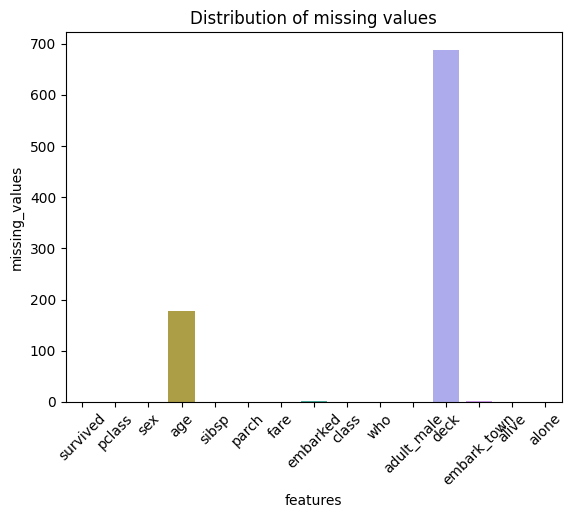

In [7]:
plt.title('Distribution of missing values')

sns.barplot(missing['features'], missing['missing_values'])
plt.xticks(rotation=45)
plt.show()

In [8]:
#fill missing values with mean
data = data.fillna(data.mean())


data.isnull().sum()

/var/folders/ch/bbgk8vxn5nj22fhbt1wttjwm0000gn/T/ipykernel_1694/3887475675.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = data.fillna(data.mean())


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Insights

Filling missing values with mean works on numeric data
to work on missing categorical values, we can use simple imputation most_frequent startegy 

In [9]:

missing_cols = ['embarked', 'deck', 'embark_town']

for col in missing_cols:
    data[col].fillna(data[col].mode()[0], inplace=True) 


data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

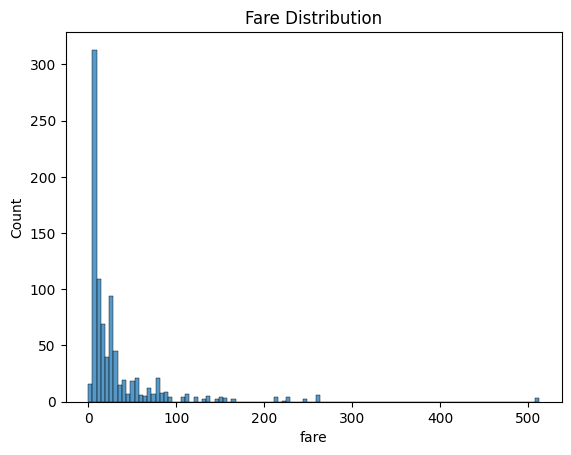

In [51]:
# check data distribution

plt.title('Fare Distribution')
sns.histplot(data['fare'])
plt.show()

## Log Scaling on Fare Column

In [10]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(func=np.log1p, inverse_func=np.expm1)

data['fare'] = log_transformer.transform(data[['fare']])

data['fare'].head()

0    2.110213
1    4.280593
2    2.188856
3    3.990834
4    2.202765
Name: fare, dtype: float64

In [11]:
print(min(data['fare']), max(data['fare']))

0.0 6.240917354759096


## Feature Engineering 

create new column 'Family_Size' by adding 'Sibsp' and 'Parch'

In [12]:
#new column

data['family_size'] = data['sibsp'] + data['parch']

data['family_size']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: family_size, Length: 891, dtype: int64

## Check distribution of numerical columns 

In [52]:
numerical = data.select_dtypes(include='number').columns

numerical

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

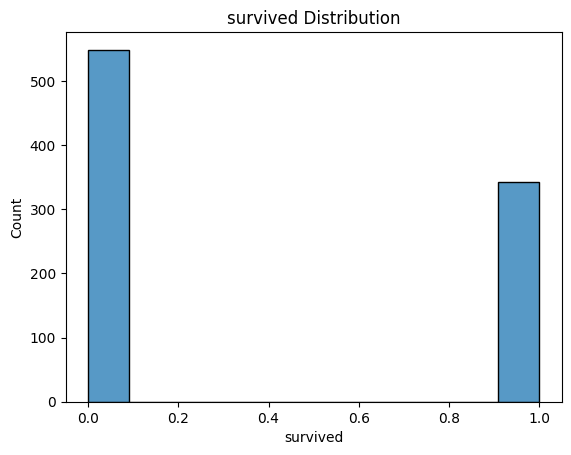

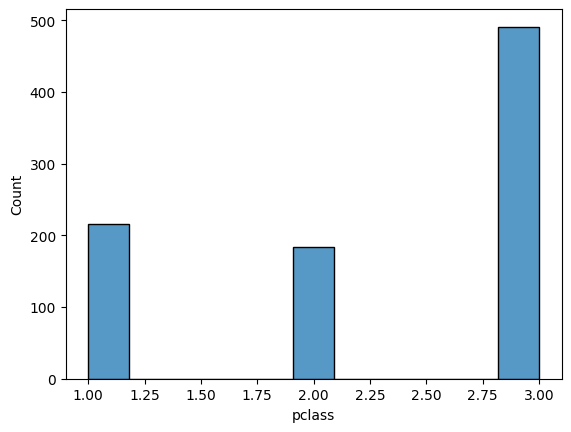

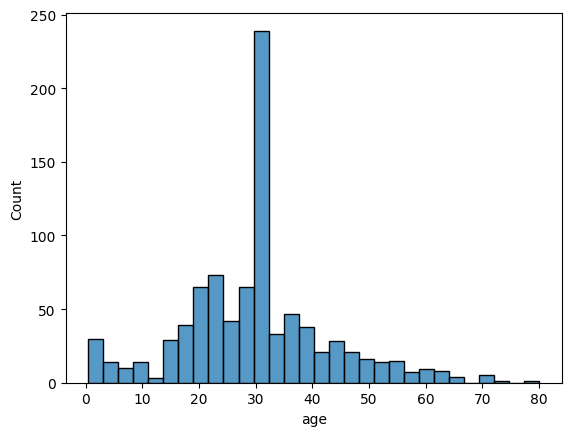

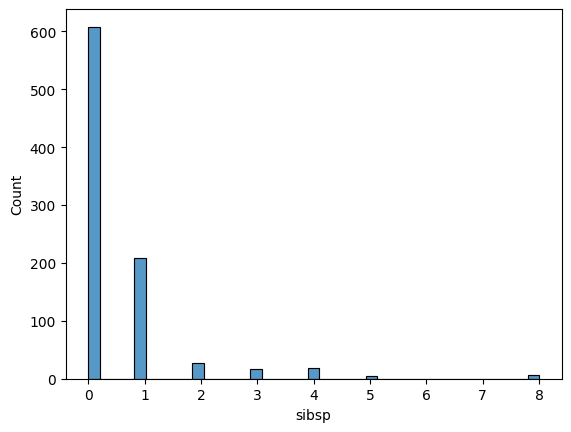

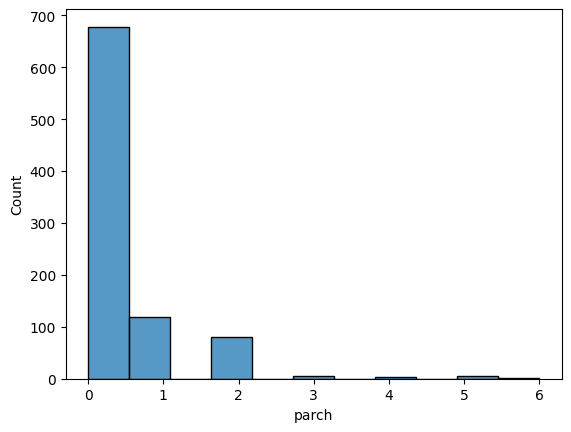

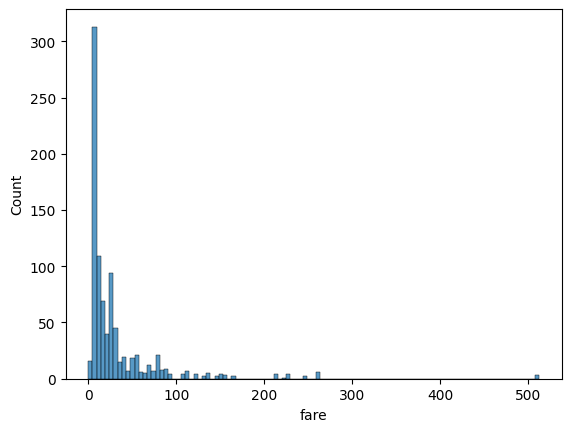

In [54]:
fig, ax = plt.subplots()

for feature in numerical:
    ax.set_title(f'{feature} Distribution')
    sns.histplot(data[feature])
    plt.show()


# Data Visualisation

1. Age Distribtion 
2. Fares paid based on who survived and who didnt 
3. correlation among numeric variables 
4. Pairplot of classes of survived column

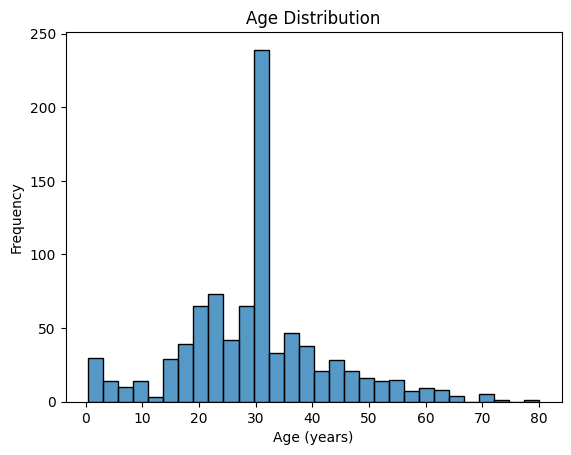

In [13]:
sns.histplot(data['age'])
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

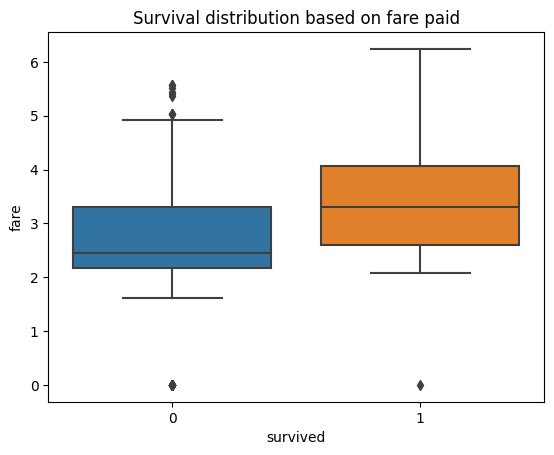

In [16]:
sns.boxplot(data=data, x='survived', y='fare')
plt.title('Survival distribution based on fare paid')
plt.show()

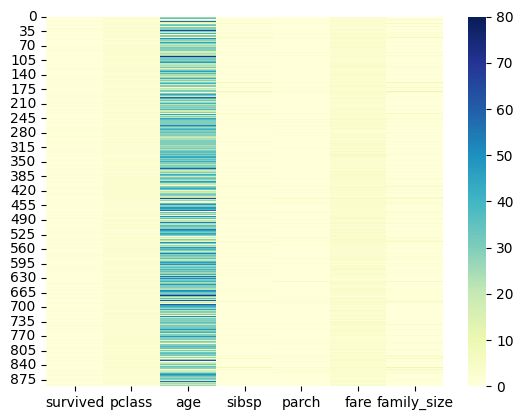

In [20]:
#heatmap
numeric_cols = list(data.select_dtypes(include='number').columns)
sns.heatmap(data[numeric_cols], cmap='YlGnBu')
plt.show()

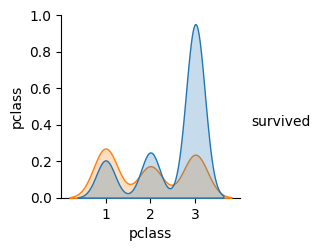

In [28]:
subset = data[['survived', 'pclass']]

sns.pairplot(subset, hue='survived')
plt.show()

In [29]:
data[numeric_cols]

,survived,pclass,age,sibsp,parch,fare,family_size
0,0,3,22.000000,1,0,2.110213,1
1,1,1,38.000000,1,0,4.280593,1
2,1,3,26.000000,0,0,2.188856,0
3,1,1,35.000000,1,0,3.990834,1
4,0,3,35.000000,0,0,2.202765,0
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,2.639057,0
887,1,1,19.000000,0,0,3.433987,0
888,0,3,29.699118,1,2,3.196630,3
889,1,1,26.000000,0,0,3.433987,0
